This file we will process the analysis of custom behaviors by analyzing the order history data of customes.

In [4]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [5]:
r=requests.get(r"https://raw.githubusercontent.com/rtheman/CLV/master/1_Input/CDNOW/CDNOW_master.txt")

In [6]:
rr=r.text

In [7]:
rrr=rr.split()#txt convert to list

In [8]:
new = []
for i in range(0, len(rrr), 4):
    new.append(rrr[i : i+4]) 
    

In [9]:
df=pd.DataFrame(new, columns=["id", 'date', 'quanlity', 'amount'])

In [10]:
df.head()

,id,date,quanlity,amount
0,00001,19970101,1,11.77
1,00002,19970112,1,12.00
2,00002,19970112,5,77.00
3,00003,19970102,2,20.76
4,00003,19970330,2,20.76


In [8]:
df.quanlity=df["quanlity"].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
id          69659 non-null object
date        69659 non-null object
quanlity    69659 non-null int32
amount      69659 non-null object
dtypes: int32(1), object(3)
memory usage: 1.9+ MB


In [10]:
#df[df["quanlity"] >= 10] call out rows

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
id          69659 non-null object
date        69659 non-null object
quanlity    69659 non-null int32
amount      69659 non-null object
dtypes: int32(1), object(3)
memory usage: 1.9+ MB


2.data cleaning

In [12]:
# missing values
df.isnull().any()

id          False
date        False
quanlity    False
amount      False
dtype: bool

In [71]:
#data.dropna(subset=["date"], how="any", inplace=True)
#delete the whole row of NAs exsisted.

In [72]:
df ["date"]

0        19970101
1        19970112
2        19970112
3        19970102
4        19970330
           ...   
69654    19970405
69655    19970422
69656    19970325
69657    19970325
69658    19970326
Name: date, Length: 69659, dtype: object

2. 一致化处理

In [73]:
# 将订单时间转化成时间格式
df["date"]=pd.to_datetime(df['date'],format='%Y%m%d')#转换格式
df

,id,date,quanlity,amount
0,00001,1997-01-01,1,11.77
1,00002,1997-01-12,1,12.00
2,00002,1997-01-12,5,77.00
3,00003,1997-01-02,2,20.76
4,00003,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


In [74]:
# 将订单的月份提取出来，方便进行分组展示
df['month']=df['date'].values.astype('datetime64[M]')
df

,id,date,quanlity,amount,month
0,00001,1997-01-01,1,11.77,1997-01-01
1,00002,1997-01-12,1,12.00,1997-01-01
2,00002,1997-01-12,5,77.00,1997-01-01
3,00003,1997-01-02,2,20.76,1997-01-01
4,00003,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


In [75]:
# 将数据类型进行调整
df['id'] = df['id'].astype(str)
df.amount=df.amount.astype(float)
df.quanlity=df.quanlity.astype(int)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
id          69659 non-null object
date        69659 non-null datetime64[ns]
quanlity    69659 non-null int32
amount      69659 non-null float64
month       69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(1), object(1)
memory usage: 2.4+ MB


In [77]:
df.head()

,id,date,quanlity,amount,month
0,00001,1997-01-01,1,11.77,1997-01-01
1,00002,1997-01-12,1,12.00,1997-01-01
2,00002,1997-01-12,5,77.00,1997-01-01
3,00003,1997-01-02,2,20.76,1997-01-01
4,00003,1997-03-30,2,20.76,1997-03-01


3.通过日期将数据排序，重新设定index

In [78]:
df = df.sort_values(by='date', axis=0, ascending=True)
df = df.reset_index(drop=True)
df

,id,date,quanlity,amount,month
0,00001,1997-01-01,1,11.77,1997-01-01
1,00216,1997-01-01,1,13.97,1997-01-01
2,00089,1997-01-01,3,47.08,1997-01-01
3,00217,1997-01-01,2,57.54,1997-01-01
4,00219,1997-01-01,3,38.51,1997-01-01
...,...,...,...,...,...
69654,11515,1998-06-30,4,47.46,1998-06-01
69655,18912,1998-06-30,3,40.36,1998-06-01
69656,08631,1998-06-30,2,29.91,1998-06-01
69657,02844,1998-06-30,2,33.48,1998-06-01


4.异常值处理

①错误值检查

In [79]:
df.describe()

,quanlity,amount
count,69659.000000,69659.000000
mean,2.410040,35.893648
std,2.333924,36.281942
min,1.000000,0.000000
25%,1.000000,14.490000
50%,2.000000,25.980000
75%,3.000000,43.700000
max,99.000000,1286.010000


发现存在订单金额=0的数据，不具有实际意义，且容易导致数据集异常，选择删除处理。

In [97]:
#get all the index of data that have no realistic meanning and drop them noticed that use ()
ind=df[df["amount"]<=0].index
df=df.drop(ind, axis=0)
df.describe()

,quanlity,amount,sd_a
count,69324.000000,69324.000000,6.932400e+04
mean,2.416191,36.004598,-2.824776e-15
std,2.337382,36.318874,1.000000e+00
min,1.000000,1.630000,-9.464665e-01
25%,1.000000,14.490000,-5.923807e-01
50%,2.000000,25.980000,-2.760162e-01
75%,3.000000,43.730000,2.127104e-01
max,99.000000,1286.010000,3.441752e+01


In [98]:
# 提取错误值的索引，删除数据所在行
# temp_index = df[df['amount']<=0].index
# df = df.drop(temp_index, axis=0)
# df.describe()

②异常值检查

Ⅰ.对购买数量字段进行标准化

In [100]:
# 对购买amount字段进行标准化
mean_=st.mean(df["amount"])
# 新增字段: 购买amount_标准化
std_ = df.amount.std()
# 新增字段: 购买数量_标准化
df["sd_a"] = (df.amount - mean_) / std_
# 查看异常数据
abnormal_a = df[(df.sd_a>3)|(df.sd_a<-3)]
abnormal_a.sort_values(by=["sd_a"],ascending=False)


,id,date,quanlity,amount,month,sd_a
68356,08830,1998-06-10,99,1286.01,1998-06-01,34.417516
23044,18847,1997-03-07,32,1119.68,1997-03-01,29.837803
18584,14894,1997-02-25,42,1028.51,1997-02-01,27.327538
39088,23474,1997-06-07,70,932.23,1997-06-01,24.676575
43615,22279,1997-07-26,63,915.10,1997-07-01,24.204919
...,...,...,...,...,...,...
39318,20307,1997-06-10,4,145.07,1997-06-01,3.002995
2628,02475,1997-01-11,5,145.05,1997-01-01,3.002445
24139,19258,1997-03-09,11,145.03,1997-03-01,3.001894
43782,00244,1997-07-27,11,144.98,1997-07-01,3.000517


通过检测发现存在1115个异常值，与业务实际情况并不是相差很大，可根据分析目的，选择是否删除，先暂时保留。

In [102]:
#standard quanlity
mean_q=df.quanlity.mean()
sd_q=df.quanlity.std()
df["sd_q"]=(df.quanlity-mean_q)/sd_q
abnormal2=df[(df.sd_q>3)|(df.sd_q<-3)]
abnormal2.sort_values(by=["sd_q"], ascending=False)

,id,date,quanlity,amount,month,sd_a,sd_q
68356,08830,1998-06-10,99,1286.01,1998-06-01,34.417516,41.321366
39088,23474,1997-06-07,70,932.23,1997-06-01,24.676575,28.914322
43615,22279,1997-07-26,63,915.10,1997-07-01,24.204919,25.919518
43797,22279,1997-07-27,56,831.35,1997-07-01,21.898956,22.924714
19855,08529,1997-02-28,56,756.47,1997-02-01,19.837218,22.924714
...,...,...,...,...,...,...,...
44350,02033,1997-07-31,10,132.86,1997-07-01,2.666806,3.244574
44202,06368,1997-07-30,10,166.78,1997-07-01,3.600756,3.244574
44048,18769,1997-07-29,10,145.88,1997-07-01,3.025298,3.244574
44037,06947,1997-07-28,10,134.55,1997-07-01,2.713339,3.244574


通过检测发现存在1113个异常值，与业务实际情况并不是相差很大，可根据分析目的，选择是否删除，先暂时保留。

Ⅱ.对订单字段进行标准化

In [103]:
df.head()

,id,date,quanlity,amount,month,sd_a,sd_q
0,00001,1997-01-01,1,11.77,1997-01-01,-0.667273,-0.605888
1,00216,1997-01-01,1,13.97,1997-01-01,-0.606698,-0.605888
2,00089,1997-01-01,3,47.08,1997-01-01,0.304949,0.249771
3,00217,1997-01-01,2,57.54,1997-01-01,0.592953,-0.178058
4,00219,1997-01-01,3,38.51,1997-01-01,0.068983,0.249771


③重复值检测

将有相同：['用户_id', '订单时间', '购买数量', '订单金额' ]的数据，视为重复值。

In [104]:
# 重复值检测
check_ = df.groupby(['id', 'date', 'quanlity', 'amount'])['id'].count()
check_

id     date        quanlity  amount
00001  1997-01-01  1         11.77     1
00002  1997-01-12  1         12.00     1
                   5         77.00     1
00003  1997-01-02  2         20.76     1
       1997-03-30  2         20.76     1
                                      ..
23568  1997-04-05  4         83.74     1
       1997-04-22  1         14.99     1
23569  1997-03-25  2         25.74     1
23570  1997-03-25  3         51.12     1
       1997-03-26  2         42.96     1
Name: id, Length: 69324, dtype: int64

In [105]:
check_.unique()

array([1], dtype=int64)

In [84]:
temp_list = []
for i, j in check_.items():
    if j>= 2:
        temp_list.append(i)
print(len(temp_list))

215


#215 outliners
#need to delete them

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
id          69659 non-null object
date        69659 non-null datetime64[ns]
quanlity    69659 non-null int32
amount      69659 non-null float64
month       69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(1), object(1)
memory usage: 2.4+ MB


In [107]:
# 删除其它重复数据，只保留第一次出现的数据
df.drop_duplicates(subset=['id', 'date', "quanlity", 'amount'],
                   keep='first',inplace=True)

5.将清洗完成的数据，进行导出


In [108]:
df.to_csv(r'C:\Users\Rachel\Desktop\proj\6-6\custom.csv')

三.分析目标

4) Analyize the process

In [114]:
df=pd.read_csv(r'C:\Users\Rachel\Desktop\proj\6-6\custom.csv', usecols=range(1,6))

In [115]:
df.head()

,id,date,quanlity,amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,216,1997-01-01,1,13.97,1997-01-01
2,89,1997-01-01,3,47.08,1997-01-01
3,217,1997-01-01,2,57.54,1997-01-01
4,219,1997-01-01,3,38.51,1997-01-01


1.了解消费趋势

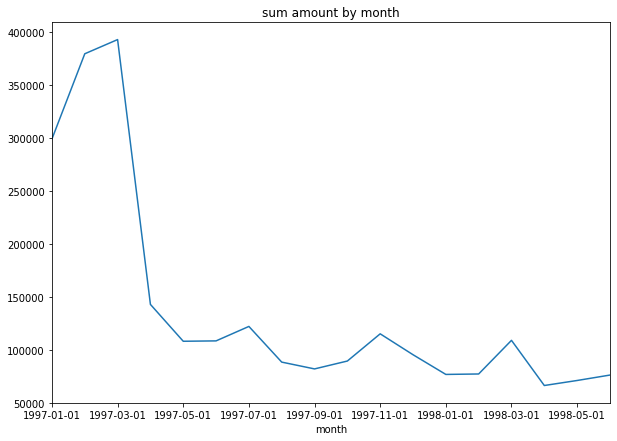

In [119]:
# sum amount by month
total_sum = df.groupby('month')['amount'].sum()
total_sum.plot(figsize=(10,7), title="sum amount by month")
plt.show()

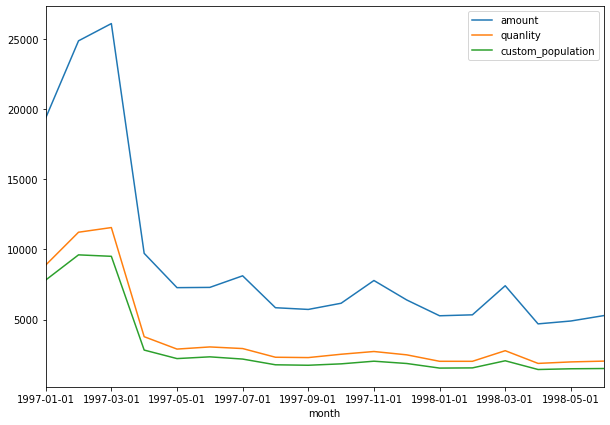

In [120]:
# 根据月份分组，查看每月购买数量，订单数量，消费人数
buy_sum = df.groupby('month')['quanlity'].sum()
buy_count = df.groupby('month')['amount'].count()
unique_user = df.groupby('month')['id'].nunique()
buy_sum.plot(figsize=(10,7), label='amount')
buy_count.plot(figsize=(10,7), label='quanlity')
unique_user.plot(figsize=(10,7), label='custom_population')
plt.legend(loc='upper right')
plt.show()

In [ ]:
购买数量，订单数量，消费人数 与 销售额，具有相同的趋势。

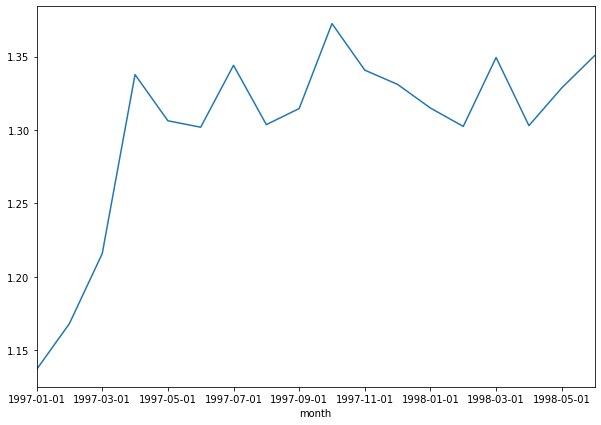

In [121]:
# 每月平均消费次数，
avg_count = df.groupby('month').apply(lambda x: x['id'].count() / x['id'].nunique())
avg_count.plot(figsize=(10, 7))

1997-01至1997-03平均消费次数在1.2次附近，说明销售额高，主要受到新用户影响；

1997-03之后，平均消费次数在1.3附近，趋势平稳；

平均消费次数整体来说很低，说明复购率低，商品对于用户粘度差。

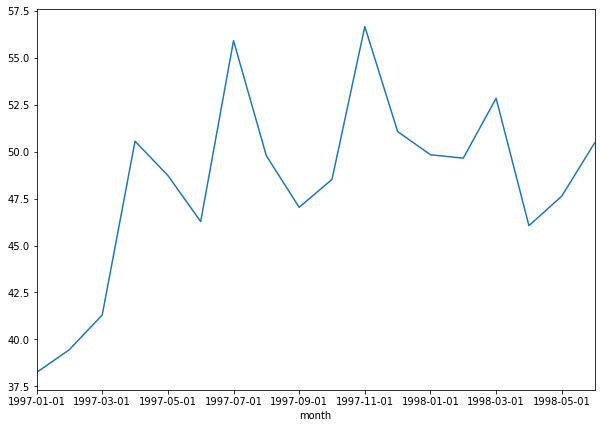

In [122]:
# 平均消费金额(客单价)
order_money_sum = df.groupby('month').apply(lambda x: x['amount'].sum() / x['id'].nunique())
order_money_sum.plot(figsize=(10, 7))

客单价在1997-01至1997-03偏低，可以怀疑是因为促销活动，导致人均消费低，所以销售额高。

之后趋势比较平稳，在45~57之间摆动。

In [125]:
grp_user = df.groupby('id').agg(sum)#sum quanlity and amount

,id,date,quanlity,amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,216,1997-01-01,1,13.97,1997-01-01
2,89,1997-01-01,3,47.08,1997-01-01
3,217,1997-01-01,2,57.54,1997-01-01
4,219,1997-01-01,3,38.51,1997-01-01
...,...,...,...,...,...
69319,11515,1998-06-30,4,47.46,1998-06-01
69320,18912,1998-06-30,3,40.36,1998-06-01
69321,8631,1998-06-30,2,29.91,1998-06-01
69322,2844,1998-06-30,2,33.48,1998-06-01


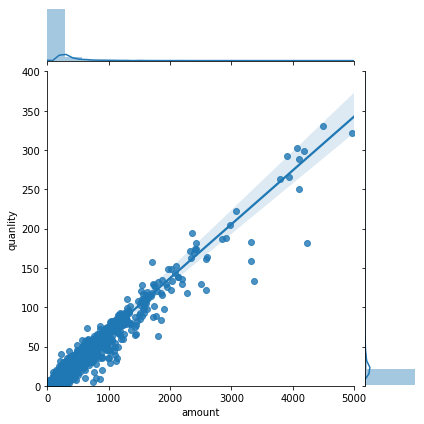

In [123]:
# 根据用户分组，查看用户的购买商品数量，与消费金额的相关性
import seaborn as sns 
grp_user = df.groupby('id').agg(sum)
sns.jointplot(grp_user['amount'],
              grp_user['quanlity'],
              kind='reg',
              xlim=(0, 5000),
              ylim=(0, 400))

订单金额与购买数量正相关程度很高；

大多数用户行为，在于订单金额[0~2000], 购买数量[0~150]之间；

In [130]:
grp_user.sort_values

<bound method DataFrame.sort_values of        quanlity  amount
id                     
1             1   11.77
2             6   89.00
3            16  156.46
4             7  100.50
5            29  385.61
...         ...     ...
23566         2   36.00
23567         1   20.97
23568         6  121.70
23569         2   25.74
23570         5   94.08

[23502 rows x 2 columns]>

In [129]:
user_buy_cumsum=grp_user.sort_values('amount').apply(lambda x :x.cumsum()/x.sum())
user_buy_cumsum

,quanlity,amount
id,,
5383,0.000006,0.000002
12682,0.000012,0.000003
12752,0.000018,0.000005
10147,0.000024,0.000006
1770,0.000030,0.000008
...,...,...
7931,0.982937,0.985411
19339,0.985194,0.988036
7983,0.988388,0.990824


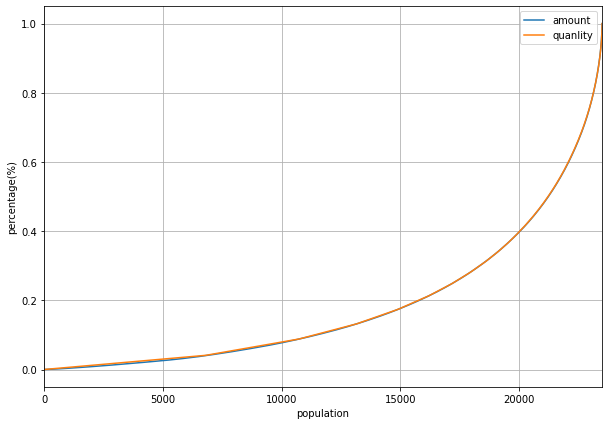

In [126]:
# amount，quanlity，累积分布
plt.figure(figsize=(10,7))
user_buy_cumsum=grp_user.sort_values('amount').apply(lambda x :x.cumsum()/x.sum())
user_count_cumsum=grp_user.sort_values('quanlity').apply(lambda x :x.cumsum()/x.sum())

user_buy_cumsum.reset_index(drop=True)['amount'].plot()
user_count_cumsum.reset_index(drop=True)['quanlity'].plot()
plt.xlabel('population')
plt.ylabel('percentage(%)')
plt.legend()
plt.grid()

In [ ]:
根据统计，用户数量=23502，其中85%(20000)的用户订单金额总数，只占了总销售额的40%

即60%的销售额，只来自于15%的用户。

Text(0, 0.5, 'number of id')

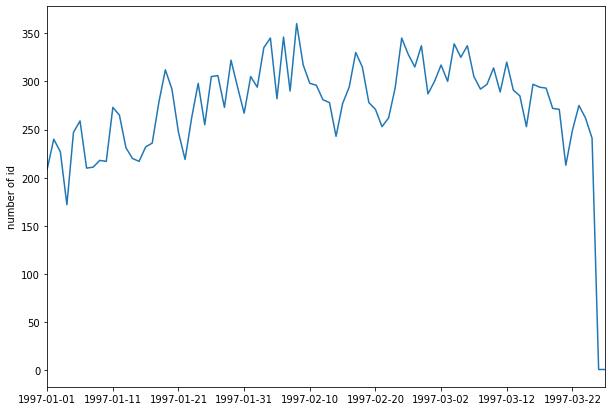

In [131]:
# 根据用户分组，用户第一次消费时间分布
plt.figure(figsize=(10,7))
date_number = df.groupby('id').agg({'date':'min'})['date'].value_counts()
date_number.sort_index().plot()
plt.ylabel('number of id')

数据来自于1997-01-01至1998-06-30用户订单数据，

但是从1997-03-22之后，就没有新增用户了，可以肯定这是导致总体销售额下降的主要原因之一。

Text(0, 0.5, 'numbers of id')

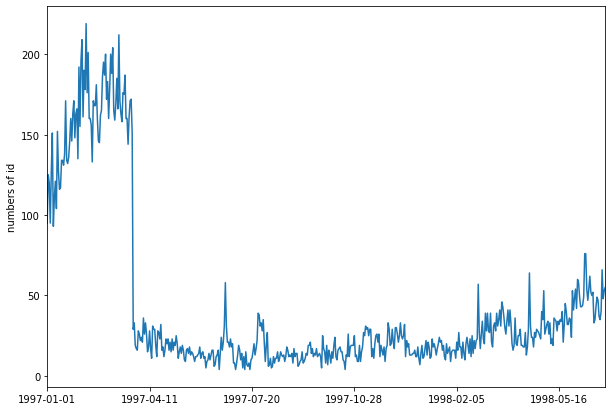

In [132]:
# 根据用户分组，用户最后一次消费时间分布
plt.figure(figsize=(10,7))
date_number = df.groupby('id').agg({'date':'max'})['date'].value_counts()
date_number.sort_index().plot()
plt.ylabel('numbers of id')

1997-01至1997-04，大量用户只消费了一次就再也不来了；

通过上一个图可知，从1997-03-22之后，就没有新增用户了，

也就是说，之后都是老用户在消费，且用户不断流失，流失的趋势分布比较均匀；

In [136]:
user_life=df.groupby('id')["date"].agg(['min','max'])
user_life.head()

,min,max
id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


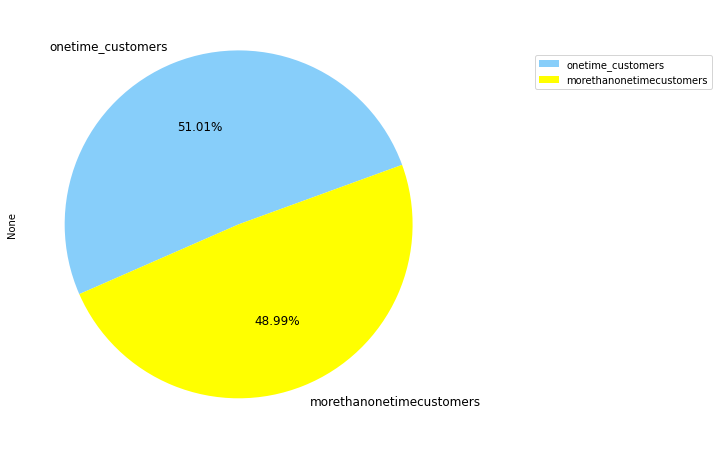

In [150]:
# 只消费1次的用户，与有复购行为的用户，占比
# 将第一次消费时间 = 最后一次消费时间的用户，定义成只消费1次的用户
fig = plt.figure(figsize=(10,8))
ax=(user_life['min']==user_life['max']).value_counts().plot.pie(
    labels=['onetime_customers','morethanonetimecustomers'],
                                                             autopct='%2.2f%%',
                                                             textprops={'fontsize':12}, 
                                                             colors=['lightskyblue','yellow'],
                             startangle=20) 
plt.legend(bbox_to_anchor=(1.6, 0.9))
plt.show()

more than 50% of the customers only ordered one time

In [ ]:
#new customers by month

In [154]:
user_new

month
1997-01-01    7814
1997-02-01    8455
1997-03-01    7231
1997-11-01       2
Name: id, dtype: int64

In [156]:
user_sum

month
1997-01-01     8882
1997-02-01    11224
1997-03-01    11556
1997-04-01     3775
1997-05-01     2892
1997-06-01     3045
1997-07-01     2930
1997-08-01     2310
1997-09-01     2286
1997-10-01     2524
1997-11-01     2719
1997-12-01     2481
1998-01-01     2021
1998-02-01     2020
1998-03-01     2777
1998-04-01     1871
1998-05-01     1977
1998-06-01     2034
Name: id, dtype: int64

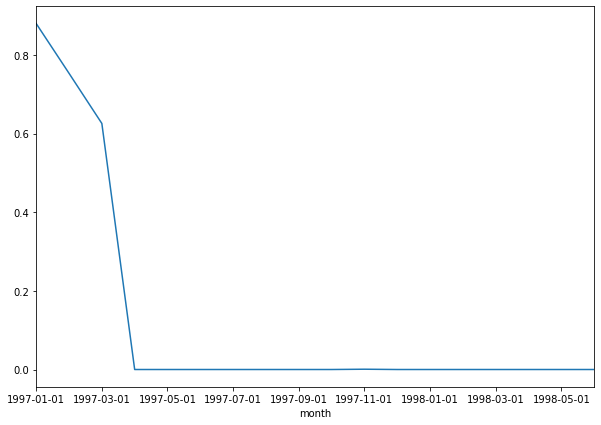

In [155]:
# 每月新增用户占比 new_customers daily by month
# 每月新增用户数
user_new=df.drop_duplicates('id').groupby('month')['id'].count()
# 每月用户数量
user_sum=df.groupby('month')['id'].count()
plt.figure(figsize=(10,7))
(user_new/user_sum).fillna(0).plot()

和之前的情况一致，1997-03-22之后，没有新增用户。

4.RFM模型对用户进行分层

RFM的基本逻辑：

①.创建用户信息表，包含字段：[用户ID，最后一次消费时间，消费总频次，消费总金额]

②.新增R，F，M三个字段，从[1~5]打分：

最后一次消费时间，距离设定的时间越近，分越高；

消费总频次，消费总金额越大，分越高；

③.提取R，F，M三个字段，减去R，F，M这三个字段的均值，如果是正数=1，否则=0

④.新增level字段，将101，或111，011这种标识，在指定的字典里，返回用户所属级别。

下面开始实现：

Ⅰ.创建用户信息表

In [158]:
# RFM
# 1.创建用户信息表
user_info = df.groupby('id').agg({'date': max,
                         'id': 'count',
                         'amount': sum})
user_info.columns = ['Last_consumption_time', 'frequency_of_consumption', 'total_amount']
user_info.head()

,Last_consumption_time,frequency_of_consumption,total_amount
id,,,
1,1997-01-01,1,11.77
2,1997-01-12,2,89.00
3,1998-05-28,6,156.46
4,1997-12-12,4,100.50
5,1998-01-03,11,385.61


In [ ]:
Ⅱ.新增R，F，M三个字段，从[1~5]打分

R

In [166]:
# 2.新增R，F，M三个字段，从[1~5]打分
# set current time
now_time = '1998-07-01'
# get the difference
diff_day = pd.to_datetime(now_time) - pd.to_datetime(user_info['Last_consumption_time'])
user_info['diff_day'] = diff_day
user_info['diff_day'] = user_info['diff_day'].astype('str')
user_info['diff_day'] = user_info['diff_day'].str.split(" ")
user_info.head()

,Last_consumption_time,frequency_of_consumption,total_amount,diff_day
id,,,,
1,1997-01-01,1,11.77,"[546, days, 00:00:00.000000000]"
2,1997-01-12,2,89.00,"[535, days, 00:00:00.000000000]"
3,1998-05-28,6,156.46,"[34, days, 00:00:00.000000000]"
4,1997-12-12,4,100.50,"[201, days, 00:00:00.000000000]"
5,1998-01-03,11,385.61,"[179, days, 00:00:00.000000000]"


In [173]:
diff_day

id
1       546 days
2       535 days
3        34 days
4       201 days
5       179 days
          ...   
23566   463 days
23567   463 days
23568   435 days
23569   463 days
23570   462 days
Name: Last_consumption_time, Length: 23502, dtype: timedelta64[ns]

In [168]:
temp_list = []
for i in user_info['diff_day']:
    temp_list.append(i[0])
user_info['diff_day'] = temp_list
user_info['diff_day'] = user_info['diff_day'].astype('int32')

In [174]:
temp_list = []
# 根据差值进行打分
for i in user_info['diff_day']:
    core = 0
    if i <= 30:
        core = 5
    elif i <= 60:
        core = 4
    elif i <= 90:
        core = 3
    elif i <= 120:
        core = 2
    else:
        core = 1
    temp_list.append(core)
user_info['R'] = temp_list
user_info

,Last_consumption_time,frequency_of_consumption,total_amount,diff_day,R
id,,,,,
1,1997-01-01,1,11.77,546,1
2,1997-01-12,2,89.00,535,1
3,1998-05-28,6,156.46,34,4
4,1997-12-12,4,100.50,201,1
5,1998-01-03,11,385.61,179,1
...,...,...,...,...,...
23566,1997-03-25,1,36.00,463,1
23567,1997-03-25,1,20.97,463,1
23568,1997-04-22,3,121.70,435,1


In [175]:
# 对消费频次打分
temp_list = []
for i in user_info['frequency_of_consumption']:
    core = 0
    if i >= 100:
        core = 5
    elif i >= 50:
        core = 4
    elif i >= 25:
        core = 3
    elif i >= 10:
        core = 2
    else:
        core = 1
    temp_list.append(core)
user_info['F'] = temp_list
user_info

,Last_consumption_time,frequency_of_consumption,total_amount,diff_day,R,F
id,,,,,,
1,1997-01-01,1,11.77,546,1,1
2,1997-01-12,2,89.00,535,1,1
3,1998-05-28,6,156.46,34,4,1
4,1997-12-12,4,100.50,201,1,1
5,1998-01-03,11,385.61,179,1,2
...,...,...,...,...,...,...
23566,1997-03-25,1,36.00,463,1,1
23567,1997-03-25,1,20.97,463,1,1
23568,1997-04-22,3,121.70,435,1,1


In [176]:
# 对消费金额打分
temp_list = []
for i in user_info['total_amount']:
    core = 0
    if i >= 3000:
        core = 5
    elif i >= 1000:
        core = 4
    elif i >= 500:
        core = 3
    elif i >= 100:
        core = 2
    else:
        core = 1
    temp_list.append(core)
user_info['M'] = temp_list
user_info

,Last_consumption_time,frequency_of_consumption,total_amount,diff_day,R,F,M
id,,,,,,,
1,1997-01-01,1,11.77,546,1,1,1
2,1997-01-12,2,89.00,535,1,1,1
3,1998-05-28,6,156.46,34,4,1,2
4,1997-12-12,4,100.50,201,1,1,2
5,1998-01-03,11,385.61,179,1,2,2
...,...,...,...,...,...,...,...
23566,1997-03-25,1,36.00,463,1,1,1
23567,1997-03-25,1,20.97,463,1,1,1
23568,1997-04-22,3,121.70,435,1,1,2


In [177]:
# 定义价值客户级别
def rfm_level(x):
    level = x.apply(lambda x: '1' if x>0 else '0')
    label = level.R+level.F+level.M
    d = {'111': 'important valuable client',
        '011': 'important remain client',
        '101': 'important saving client',
        '001': 'important developing client',
        '110': 'normal value client',
        '010': 'normal remaining client',
        '100': 'normal saving client',
        '000': 'normal developing client'
    }
    return d[label]
user_info['level'] = user_info[['R','F','M']].apply(lambda x: x-x.mean()).apply(rfm_level,axis=1)
user_info

,Last_consumption_time,frequency_of_consumption,total_amount,diff_day,R,F,M,level
id,,,,,,,,
1,1997-01-01,1,11.77,546,1,1,1,normal developing client
2,1997-01-12,2,89.00,535,1,1,1,normal developing client
3,1998-05-28,6,156.46,34,4,1,2,important saving client
4,1997-12-12,4,100.50,201,1,1,2,important developing client
5,1998-01-03,11,385.61,179,1,2,2,important remain client
...,...,...,...,...,...,...,...,...
23566,1997-03-25,1,36.00,463,1,1,1,normal developing client
23567,1997-03-25,1,20.97,463,1,1,1,normal developing client
23568,1997-04-22,3,121.70,435,1,1,2,important developing client


In [178]:
# 根据用户等级进行统计
rfm_count = user_info.groupby('level').agg({'level':'count'})
rfm_count.columns = ['quanlity_levels']
rfm_count

,quanlity_levels
level,
important developing client,2990
important remain client,171
important saving client,2095
important valuable client,974
normal developing client,16092
normal saving client,1180


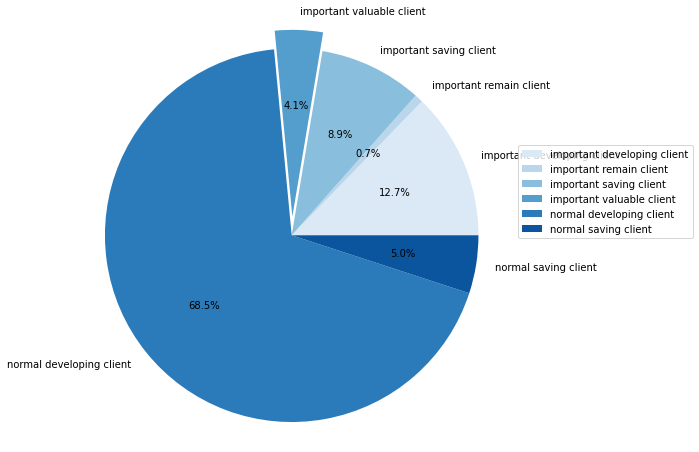

In [179]:
# RFM，根据用户等级分组，了解人数占比
import seaborn as sns 
plt.figure(figsize=(8,8))
plt.pie(rfm_count['quanlity_levels'],
       labels=rfm_count.index, 
        colors=sns.color_palette('Blues',n_colors=6),
        explode=(0,0,0,0.1,0,0),
        labeldistance=1.1, 
        autopct='%3.1f%%'
)
plt.axis('equal')
plt.legend( bbox_to_anchor=(1.0, 0.7)) 

In [ ]:
可以看出，大部分人群都属于一般发展客户；

In [182]:
user_sum = user_info.groupby('level').agg({'frequency_of_consumption': sum, 'total_amount': sum})
user_sum

,frequency_of_consumption,total_amount
level,,
important developing client,11434,590027.44
important remain client,2349,100977.91
important saving client,11994,498777.13
important valuable client,16875,677315.92
normal developing client,22887,554509.33
normal saving client,3785,74375.02


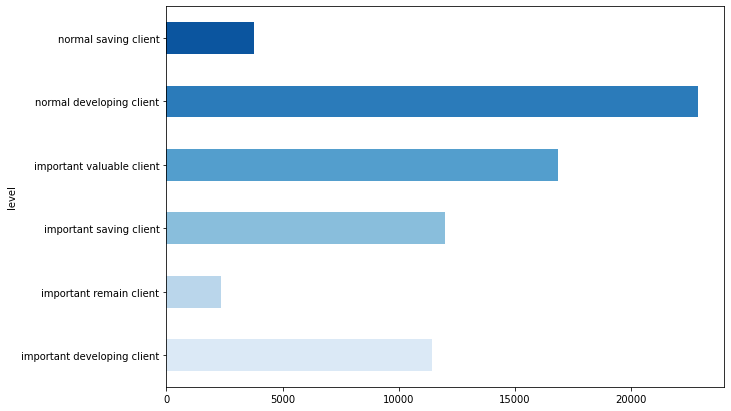

In [184]:
# 根据用户等级分组，了解用户消费情况
plt.figure(figsize=(10,7))
user_sum['frequency_of_consumption'].plot(kind='barh',
                      color=sns.color_palette('Blues',n_colors=6))

重要价值客户[111]，是贡献度最高的群体，需要重点关注；

重要发展用户[101]，需要增加此类客户的消费频率，了解用户喜欢什么类型的产品，增加产品的粘性；

重要保持用户[011], 说明此类用户在过去是重要价值客户，但是很久不来了，要主动联系，找出原因；

重要挽留用户[001], 此类用户很久没来了，且消费频数低，但是贡献了大量的销售额，需要找出原因。

5.用户状态分析

In [185]:
# 每月消费情况表，记录当月是否发生购买行为
data_pivot=pd.pivot_table(df,
                          index='id',
                          columns='month',
                          values='date',
                          aggfunc='count').fillna(0).applymap(lambda x: 1 if x>0 else 0)
data_pivot

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [186]:
# 定义用户状态：
def user_status(df):
    status=[]
    for i in range(len(df)):
        #本月未消费
        if df[i]==0:
            if len(status)==0:
                status.append('unreg')
            else:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
        #本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unreg':
                    status.append('new')
                elif status[i-1]=='unactive':
                    status.append('return')
                else:
                    status.append('active')
    return status
user_status=data_pivot.apply(user_status,axis=1,raw=True)
user_status

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


用户状态

unreg 未注册：此用户当月，与之前月份都没有发生过购买行为；

new 新增用户：此用户当月第一次发生过购买行为；

active活跃：此用户上个月有过购买行为，且当月也发生了购买行为；

unactive不活跃：此用户已注册，但当前月没有过购买行为；

return 回流：此用户已注册，上个月没有购买行为，但是当前月发生了购买行为。

C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27599 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22411 missing 

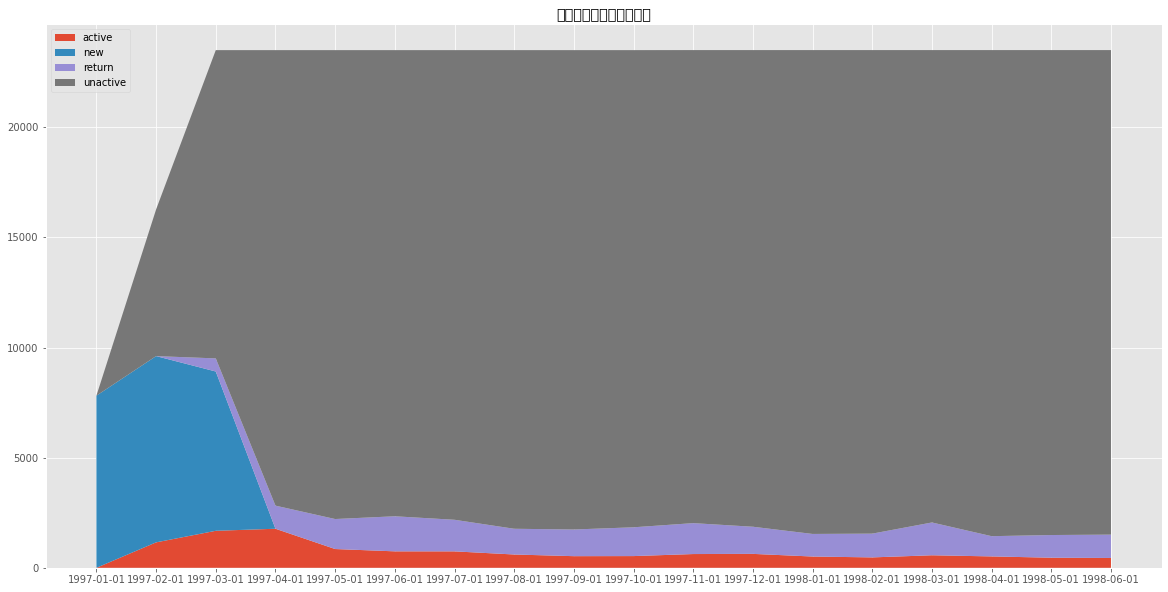

In [189]:
# 统计每个月每种状态的用户数
purchase_ct=user_status.replace('unreg',np.NAN).apply(lambda x:pd.value_counts(x))
purchase_stack=purchase_ct.fillna(0).T
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(20,10))
ax.stackplot(purchase_stack.index,
             purchase_stack['active'],
             purchase_stack['new'],
             purchase_stack['return'],
             purchase_stack['unactive'])
plt.title('每月用户类型占比面积图')
plt.legend(['active','new','return','unactive'],loc='upper left')
plt.show()

可以看到新增用户出现在1997-01至1997-04；

大量用户都属于不活跃用户；

回流用户与活跃用户虽然分布比较平稳，但是只占了少数。

C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27963 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 36291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27969 missing 

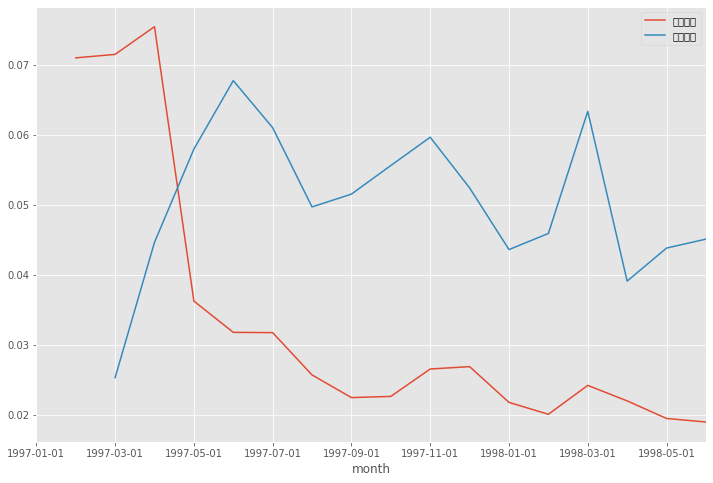

In [190]:
# 每月活跃用户,回流用户对比
purchase_ct.apply(lambda x: x/x.sum()).loc[['active','return']].T.plot(figsize=(12,8))
plt.legend(['活跃用户','回流用户'])

活跃用户，从7%一直在下降；

回流用户，从1997-3开始上升，一直在4%~7%之间，趋于稳定；

6.用户生命周期分析

用户生命周期：最后一次购买和第一次购买的时间间隔。

(array([13125.,   689.,   501.,   431.,   359.,   440.,   411.,   366.,
          372.,   486.,   509.,   498.,   504.,   660.,   699.,   807.,
          905.,   923.,   603.,   214.]),
 array([  0. ,  27.2,  54.4,  81.6, 108.8, 136. , 163.2, 190.4, 217.6,
        244.8, 272. , 299.2, 326.4, 353.6, 380.8, 408. , 435.2, 462.4,
        489.6, 516.8, 544. ]),
 <a list of 20 Patch objects>)

C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 29983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 29983 missing 

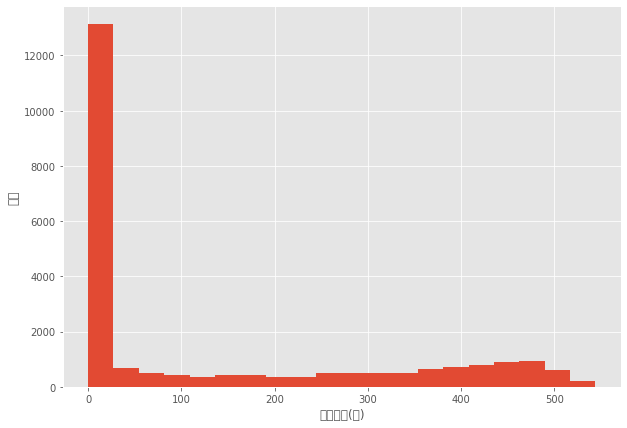

In [192]:
# 用户生命周期分析
df['date'] = pd.to_datetime(df['date'])
user_life=df.groupby('id').agg({'date':'max'})-df.groupby('id').agg({'date':'min'})
user_life=user_life['date']/np.timedelta64(1,'D')
plt.figure(figsize=(10, 7))
plt.xlabel('生命周期(天)')
plt.ylabel('人数')
plt.hist(user_life,bins=20)

可以看出，大部分用户属于只够买一次的用户；

我们将只够买一次的用户去除，进一步查看复购用户的生命周期；

# 复购用户生命周期

(array([1114.,  685.,  481.,  426.,  355.,  434.,  405.,  370.,  380.,
         482.,  507.,  502.,  506.,  661.,  706.,  778.,  905.,  923.,
         603.,  214.]),
 array([  2. ,  29.1,  56.2,  83.3, 110.4, 137.5, 164.6, 191.7, 218.8,
        245.9, 273. , 300.1, 327.2, 354.3, 381.4, 408.5, 435.6, 462.7,
        489.8, 516.9, 544. ]),
 <a list of 20 Patch objects>)

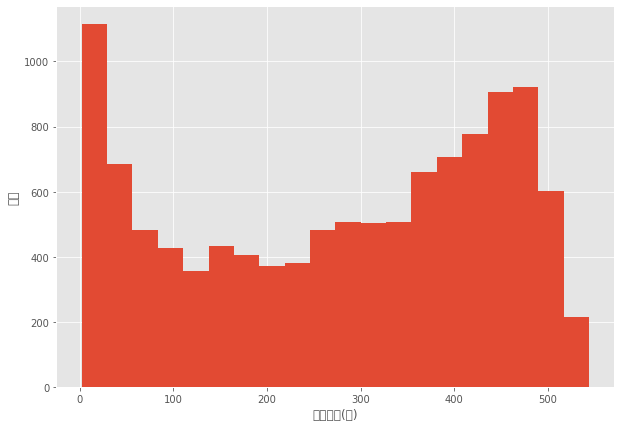

In [193]:
# 复购用户生命周期
re_user_life = user_life.where(user_life.values>1).dropna()
plt.figure(figsize=(10, 7))
plt.xlabel('生命周期(天)')
plt.ylabel('人数')
plt.hist(re_user_life,bins=20)

复购用户生命周期呈现双峰分布，第一个高峰出现在用户生命周期只有1个月内，

第二个高峰，呈现出左偏正态分布，大量用户生命周期在450天附近。

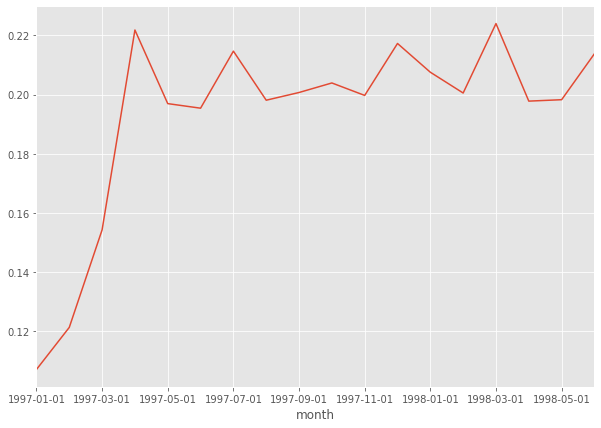

In [196]:
# 7.复购率分析

# 复购率分析
# 每月消费情况表
data_pivot=pd.pivot_table(df,
                          index='id',
                          columns='month',
                          values='date',
                          aggfunc='count').fillna(0)
# 购买次数>1的设置=1
# 购买次数=1的设置=0
# 购买次数=0的设置=NaN
re_buy=data_pivot.applymap(lambda x: 1 if x>1 else np.NAN if x==0 else 0)
(re_buy.sum()/re_buy.count()).plot(figsize=(10,7)) # 复购次数/购买次数

In [ ]:
# 大部分客户是1月开始注册，从3月之后复购率趋向稳定，复购人数占总人数20%左右。

# 每月复购用户与有消费行为用户人数对比
re_buy.count().plot(figsize=(10, 7))
re_buy.sum().plot(figsize=(10, 7))
plt.xlabel('时间（月）') 
plt.ylabel('人数') 
legends = ['有消费行为用户', '复购用户']
plt.legend(legends, loc = 'upper right')

可以看出，有消费行为的用户数与复购用户数正相关，当有消费行为的用户数多时，复购用户数量也在增加。

In [197]:
# 8.回购率分析

# 定义用户状态：
def user_status(df):
    status=[]
    for i in range(len(df)):
        #本月未消费
        if df[i]==0:
            if len(status)==0:
                status.append('unreg')
            else:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
        #本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unreg':
                    status.append('new')
                elif status[i-1]=='unactive':
                    status.append('return')
                else:
                    status.append('active')
    return status

df_back = df_buy.apply(user_status, axis=1, raw=True)
df_back
# 将回流用户标记=1，新增用户和活跃用户标记=0，未注册用户和不活跃用户标记=NAN
df_buy_back=df_back.replace({'unreg': np.NAN,
                             'unactive': np.NAN,
                             'return': 1,
                             'new': 0,
                             'active': 0})
df_buy_back
(df_buy_back.sum()/df_buy_back.count()).plot(figsize=(10,7)) # 回购人数/有购买行为人数


NameError: name 'df_buy' is not defined

回购人数，从1997-03月开始上升，之后趋向平稳，占购买人数的60%~70%，回购用户表示在之前的月份不活跃，然后在之后出现了购买行为，这样的用户占据大多数，并不是好事。

# 每月回购用户与有消费行为用户人数对比

In [ ]:
# 每月回购用户与有消费行为用户人数对比
df_buy_back.count().plot(figsize=(10, 7))
df_buy_back.sum().plot(figsize=(10, 7))
plt.xlabel('时间（月）') 
plt.ylabel('人数') 
legends = ['有消费行为用户', '回购用户']
plt.legend(legends, loc = 'upper right')

In [ ]:
9.次月留存率分析

因为只有1997前3个月有新增用户，所以只分三组：一月组，二月组，三月组。

# 每月消费情况表

In [ ]:
# 每月消费情况表
data_pivot=pd.pivot_table(df,
                          index='用户_id',
                          columns='订单月份',
                          values='订单时间',
                          aggfunc='count').fillna(0)
# 有购买行为=1，没有=0
df_buy=data_pivot.applymap(lambda x: 1 if x>0 else 0)
df_buy

# 定义用户状态：
def user_status(data):
    status=[]
    for i in range(len(data)):
        #本月未消费
        if data[i]==0:
            if len(status)==0:
                status.append('unreg')
            else:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
        #本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unreg':
                    status.append('new')
                elif status[i-1]=='unactive':
                    status.append('return')
                else:
                    status.append('active')
    return status

df_buy_info = df_buy.apply(user_status, axis=1, raw=True)
df_buy_info

In [ ]:
# 获取一月,二月，三月 新增用户ID
new_one_id = df_buy_info.where(df_buy_info['1997-01-01'] == 'new').dropna().index
new_one_id = list(new_one_id)

new_two_id = df_buy_info.where(df_buy_info['1997-02-01'] == 'new').dropna().index
new_two_id = list(new_two_id)

new_three_id = df_buy_info.where(df_buy_info['1997-03-01'] == 'new').dropna().index
new_three_id = list(new_three_id)

# 获取每个月除了新增用户，有购买行为的用户ID
dict_month_id = {}
for i in df_buy_info.columns:
    dict_month_id[i] = list(df_buy_info[(df_buy_info[i]=='active') | (df_buy_info[i]=='return')].dropna().index)
dict_month_id

# 一月组
# 将每月的用户ID提取出来
all_id = []
for k, v in dict_month_id.items():
    all_id.append(v)
len(all_id)  # 18

# 1月用户ID
len(new_one_id)  # 7814

# 删除一月用户id
del all_id[0]

one_grp_list = []
# 从二月开始遍历
for i in range(len(all_id)):
    temp_list = all_id[i]
    n = 0
    # 若过当前月ID，在1月存在，+1
    for j in temp_list:
        if j in new_one_id:
            n+=1
    one_grp_list.append(n/len(new_one_id))
one_grp_list

# 二月组
# 将每月的用户ID提取出来
all_id = []
for k, v in dict_month_id.items():
    all_id.append(v)
len(all_id)  # 18

# 2月用户ID
len(new_two_id)  # 8455

# 删除1月用户ID
del all_id[0]
# 删除2月用户ID
del all_id[0]

two_grp_list = []
# 从3月开始遍历
for i in range(len(all_id)):
    temp_list = all_id[i]
    n = 0
    # 若过当前月ID，在2月存在，+1
    for j in temp_list:
        if j in new_two_id:
            n+=1
    two_grp_list.append(n/len(new_two_id))
two_grp_list

# 三月组
# 将每月的用户ID提取出来
all_id = []
for k, v in dict_month_id.items():
    all_id.append(v)
len(all_id)  # 18

# 3月用户ID
len(new_three_id)  # 7231

# 删除1月用户ID
del all_id[0]
# 删除2月用户ID
del all_id[0]
# 删除3月用户ID
del all_id[0]

three_grp_list = []
# 从4月开始遍历
for i in range(len(all_id)):
    temp_list = all_id[i]
    n = 0
    # 若过当前月ID，在2月存在，+1
    for j in temp_list:
        if j in new_three_id:
            n+=1
    three_grp_list.append(n/len(new_three_id))
three_grp_list

# 前三个月，用户次月留存率对比
pd.Series(one_grp_list).plot(figsize=(10, 7), label='一月组')
pd.Series(two_grp_list).plot(figsize=(10, 7), label='二月组')
pd.Series(three_grp_list).plot(figsize=(10, 7), label='三月组')
plt.legend(loc='upper left')

In [ ]:
三组次月留存率的趋势大同小异，都在0~16%之间波动，整体来说留存率低；

3月组，在隔了三月之后，留存率降为0，很明显异于其它组别，可以继续深入分析其中的原因。

五.总结与建议